In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt

In [30]:
import numpy as np
import os
import pyttsx3

In [31]:
data = [[3,1.5,1],
        [2,1,0],
        [4,1.5,1],
        [3,1,0],
        [3.5,0.5,1],
        [2,0.5,0],
        [5.5,1,1],
        [1,1,0]]


In [32]:
mystery_flower = [4.5,1]

In [33]:
#The neural network influencers
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [35]:
def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

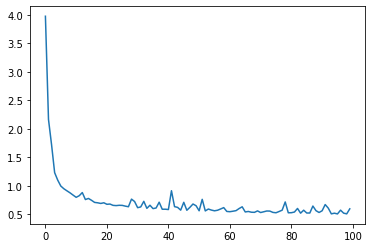

In [44]:
def train():
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    #training of the network
    costs = []
    #learning rate
    alpha = 0.1
    for i in range(10000):
        ri = np.random.randint(len(data))
        point = data[ri]
        z = point[0]*w1 + point[1]*w2 + b
        pred = sigmoid(z)
        target = point[2]
        cost = np.square(pred-target)
        if i%100 ==0:
            cost_sum = 0
            for j in range(len(data)):
                point = data[j]
                z = point[0]*w1 + point[1]*w2 + b
                pred = sigmoid(z)
                target = point[2]
                cost_sum += np.square(pred - target)
            costs.append(cost_sum)
        dcost_dpred = 2*(pred-target)

        dpred_dz = sigmoid_p(z)
        #Partial derivatives
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        #using the chain rule
        dcost_dz  = dcost_dpred * dpred_dz
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db  = dcost_dz * dz_db
        #Error Regression
        w1 = w1 - alpha*dcost_dw1
        w2 = w2 - alpha*dcost_dw2
        b = b - alpha*dcost_db    
    return costs,w1,w2,b
costs,w1,w2,b = train()
fig = plt.plot(costs)

In [45]:
for i in range(len(data)):
    point = data[i]
    print (point)
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    print(pred)


[3, 1.5, 1]
0.5995685117146563
[2, 1, 0]
0.07247356013825863
[4, 1.5, 1]
0.9479984538139354
[3, 1, 0]
0.48753067669546174
[3.5, 0.5, 1]
0.6783639006801204
[2, 0.5, 0]
0.04729707416257806
[5.5, 1, 1]
0.9979719329439601
[1, 1, 0]
0.006376675225698079


In [46]:
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 + b
pred = sigmoid(z)
print(pred)


0.9758548458101433


In [47]:
def which_flower(length,width):
    z = length*w1 + width*w2 + b
    pred = sigmoid(z)
    if pred<0.5:
        engine = pyttsx3.init()
        engine.say('The flower is blue')
        engine.runAndWait()
    else:
        engine = pyttsx3.init()
        engine.say('The flower is red')
        engine.runAndWait()


In [48]:
which_flower(3,1)